In [8]:
# -*- coding: utf-8 -*-
# =============================================================================
#     qopt-applications
#     Copyright (C) 2020 Julian Teske, Forschungszentrum Juelich
#
#     This program is free software: you can redistribute it and/or modify
#     it under the terms of the GNU General Public License as published by
#     the Free Software Foundation, either version 3 of the License, or
#     (at your option) any later version.
#
#     This program is distributed in the hope that it will be useful,
#     but WITHOUT ANY WARRANTY; without even the implied warranty of
#     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
#     GNU General Public License for more details.
#
#     You should have received a copy of the GNU General Public License
#     along with this program. If not, see <http://www.gnu.org/licenses/>.
#
#     Contact email: j.teske@fz-juelich.de
# =============================================================================

# Spin-Orbit-Valley Model

The full model including the valley degree of freedom is implemented analogously to the spin-orbit model. In this notebook, I will only highlight two important features being the new energy spectrum and the more involved choice of the computational states.


In [9]:
import numpy as np
from qopt import *
import matplotlib.pyplot as plt
import copy
import time

## Energy Spectrum

The energy spectrum becomes much more complicated if the valley degree of freedom is included, because it introduces a large number of avoided crossings and can also lead to actual crossings. The shape depends strongly on the angle between the complex valley splittings.

<AxesSubplot:xlabel='Detuning ($\\mu$eV)'>

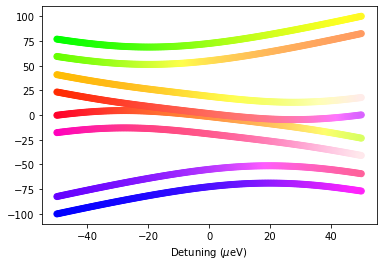

In [10]:
from flopping_mode_setup import create_hamiltonian_valley, \
        micro_eV_by_inverse_nano_seconds, milli_tesla_Si_by_inverse_nano_seconds, default_par_dict
from typing import List

parameter_dict = copy.deepcopy(default_par_dict)

# For illustration, we choose a very small tunnel coupling and a large zeeman
# energy. These values are not favorable for the operation of flopping-mode EDSR
# in the strong driving regime.
parameter_dict['tunnel_coupling'] = 20 * micro_eV_by_inverse_nano_seconds
parameter_dict['e_zeeman'] = 100 * milli_tesla_Si_by_inverse_nano_seconds

eps_range = np.linspace(
        -50 * micro_eV_by_inverse_nano_seconds,
        50 * micro_eV_by_inverse_nano_seconds,
        200
)

hamiltonians = [
    create_hamiltonian_valley(
        tunnel_coupling=parameter_dict['tunnel_coupling'],
        eps=e,
        gmubbx=parameter_dict['gmubbx'],
        gmubbz=parameter_dict['gmubbz'],
        e_zeeman=parameter_dict['e_zeeman'],
        real_valley_l=60 * micro_eV_by_inverse_nano_seconds,
        imag_valley_l= 0,
        real_valley_r=15 * micro_eV_by_inverse_nano_seconds,
        imag_valley_r=15 * micro_eV_by_inverse_nano_seconds
) for e in eps_range
]

# To enjoy the colors of the 'plot_energy_spectrum' functions,
# we need to transform to a meaningful basis.
def eig_basis_of_first_element(hamiltonians: List[DenseOperator]):
    """
    Convenience function for the plotting of energy spectra.

    Transform all hamiltonians into the eigenbasis of the first hamiltonian.
    """
    _, eig_vecs = hamiltonians[0].spectral_decomposition(hermitian=True)
    eigenbasis = DenseOperator(eig_vecs)
    hamiltonians_eig_basis_detuning = [eigenbasis.dag() * h * eigenbasis for h in hamiltonians]
    return hamiltonians_eig_basis_detuning

hamiltonians = eig_basis_of_first_element(hamiltonians)

plot_energy_spectrum(
        hamiltonian=hamiltonians,
        x_val=eps_range / micro_eV_by_inverse_nano_seconds,
        x_label="Detuning ($\mu$eV)"
)

## Identification of the computational state

It is not trivial to identify the correct computational states, which are defined to be the two states of the lowest energy with different spin directions.

In [11]:
from flopping_mode_setup import find_computational_states

find_computational_states(
    real_valley_l=60 * micro_eV_by_inverse_nano_seconds,
    imag_valley_l= 0,
    real_valley_r=15 * micro_eV_by_inverse_nano_seconds,
    imag_valley_r=15 * micro_eV_by_inverse_nano_seconds,
    **parameter_dict)

[0, 1]

In this case, the two lowest lying states have a distinct spin, but this can depend on the valley energies.